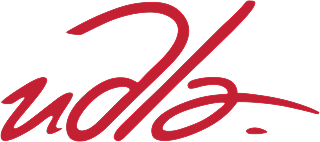


# Polynomial (Quadratic) Regression: Analytical, Gradient Descent, and MLP Approaches

## Integrantes:
- Juan Aristizabal
- Domenica Escobar
- Jossue Játiva
- Enrique Merizalde

## Instrucciones
Entregue un Jupyter Notebook (.ipynb) y su versión HTML exportada (.html). Trabaje en grupos de hasta 5 miembros, nombrando los archivos con las primeras letras de sus nombres o apellidos (p. ej., ABCD.ipynb). Implemente tres modelos de regresión cuadrática utilizando el conjunto de datos disponible en https://raw.githubusercontent.com/Machine1314/natural_computing/main/data_regression.csv. Documente cada paso, incluyendo el código, las visualizaciones y un análisis comparativo de los resultados en el notebook.

## Descripción del proyecto
Este proyecto explora la regresión cuadrática (ajuste de un polinomio de segundo orden) mediante tres enfoques distintos: una solución analítica, una solución numérica mediante descenso de gradiente y un perceptrón multicapa (MLP). Utilizando el conjunto de datos proporcionado, preprocesará los datos, ajustará cada modelo y evaluará su rendimiento con métricas como el error cuadrático medio (MSE) y el R cuadrado. La solución analítica aprovecha las funciones de la biblioteca para mayor precisión, el descenso de gradiente construye el modelo desde cero para profundizar en la comprensión de la optimización, y el MLP prueba la capacidad de las redes neuronales para aproximarse a relaciones cuadráticas, incluyendo escenarios de sobreajuste. Los resultados se compararán en paralelo para evaluar las compensaciones entre precisión y complejidad, utilizando recursos como diapositivas de ajuste de curvas, cuaderno de descenso de gradiente y ejemplos de MLP.

## Objetivos
Objetivo 1: Implementar y comparar un modelo analítico de regresión cuadrática con una solución de descenso de gradiente personalizada, evaluando su precisión y convergencia en el conjunto de datos.

Objetivo 2: Diseñar un modelo de regresión cuadrática (MLP) para ajustar una regresión cuadrática, analizando su rendimiento en diferentes niveles de complejidad e identificando tendencias de sobreajuste.

## Fundamentos Teóricos
Antes de profundizar en el contenido central de esta investigación, es importante presentar los conceptos fundamentales y los principios teóricos que sustentan este trabajo para comprender plenamente las metodologías, los resultados y los análisis comparativos que se presentan en las siguientes secciones.

### Regresión polinomial
La regresión polinómica amplía la regresión lineal al introducir relaciones no lineales entre las variables independientes y la variable dependiente mediante términos polinómicos. En concreto, la regresión cuadrática ajusta un polinomio de segundo grado:

**y=β0 + β1x + β2x²+ϵ**

donde 𝛽0, 𝛽1, 𝛽2 son los parámetros del modelo y 𝜖 es el término de error. A diferencia de los modelos puramente lineales, la regresión cuadrática captura curvaturas, lo que permite un modelado más flexible de patrones de datos del mundo real.

### Métodos Analíticos vs. Numéricos
Las soluciones analíticas utilizan expresiones de forma cerrada para calcular los parámetros óptimos del modelo, generalmente mediante manipulación algebraica u operaciones matriciales. Los métodos numéricos, como el descenso de gradiente, buscan iterativamente la solución óptima minimizando una función de coste definida, lo que a menudo los hace más adaptables a problemas a gran escala o no lineales donde las soluciones analíticas se vuelven inviables.

### Optimización por Descenso de Gradiente
El descenso de gradiente es un algoritmo de optimización de primer orden ampliamente utilizado en aprendizaje automático. Al actualizar iterativamente los parámetros en la dirección del gradiente negativo de una función de coste, el algoritmo busca minimizar el error. Comprender las tasas de aprendizaje, el comportamiento de convergencia y los panoramas de costes es crucial para aplicar el descenso de gradiente de forma eficaz.

### Perceptrones Multicapa (MLP)
Un MLP es un tipo de red neuronal artificial de propagación hacia adelante compuesta por una capa de entrada, una o más capas ocultas y una capa de salida. Los MLP son capaces de aproximar funciones no lineales complejas, incluyendo relaciones polinómicas. Sin embargo, debido a su flexibilidad, también son propensos al sobreajuste, especialmente cuando la complejidad del modelo supera la complejidad del patrón subyacente en los datos.

### Métricas de evaluación: Error cuadrático medio y R cuadrado
* El ECM cuantifica la diferencia cuadrática media entre los valores predichos y los reales, lo que proporciona una medida directa del error.

* El R cuadrado indica la proporción de varianza en la variable dependiente explicada por el modelo, ofreciendo una medida normalizada de la bondad de ajuste.
Estas métricas son fundamentales para evaluar y comparar el rendimiento del modelo.

## Contexto del Proyecto
Esta investigación presenta el desarrollo y análisis comparativo de tres enfoques distintos para la regresión cuadrática utilizando un conjunto de datos reales. El estudio no solo destaca las fortalezas y limitaciones de cada método, sino que también explora las compensaciones entre la precisión analítica, la flexibilidad numérica y la adaptabilidad de las redes neuronales.

#### Los objetivos son:
* Adquirir experiencia práctica con herramientas de regresión analítica utilizando bibliotecas consolidadas.
* Profundizar en la comprensión de la optimización numérica implementando el descenso de gradiente desde cero.
* Explorar el comportamiento de las redes neuronales (MLP) al aplicarlas a una tarea de ajuste polinomial, incluyendo fenómenos como el sobreajuste.

El objetivo final es fundamentar futuras decisiones de modelado proporcionando resultados empíricos y perspectivas teóricas.

## 1. Importar bibliotecas y cargar datos

Para implementar y comparar los modelos de regresión cuadrática, utilizamos las siguientes bibliotecas y herramientas de Python, cada una seleccionada por sus ventajas específicas:

* pandas (import pandas as pd)
Se utiliza para leer y gestionar el conjunto de datos de forma eficiente, proporcionando estructuras DataFrame flexibles, ideales para la limpieza y preparación de datos.

* numpy (import numpy as np)
Proporciona operaciones numéricas rápidas y gestión de matrices, esencial para los cálculos en la implementación personalizada del descenso de gradiente.

* matplotlib (import matplotlib.pyplot as plt)
Se utiliza para visualizar tendencias de datos, ajustes del modelo y gráficos de comparación, facilitando la interpretación y comunicación de los resultados.

### Módulos de scikit-learn

* StandardScaler: Características escaladas para mejorar el rendimiento del modelo y garantizar comparaciones justas.

* PolinomialFeatures: Genera términos cuadráticos y de interacción necesarios para la regresión polinómica.

* Regresión lineal: Se ofreció una implementación precisa de la solución analítica basada en bibliotecas.

* Error cuadrático medio y puntuación r²: Se evaluó la precisión del modelo mediante el error estándar y las métricas de ajuste.

* Regresor MLP: Se crearon modelos de redes neuronales (MLP) para explorar comportamientos de ajuste no lineal y sobreajuste.

In [111]:
# Imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

In [112]:
# Load dataset
url = 'https://raw.githubusercontent.com/Machine1314/natural_computing/main/data_regression.csv'
data = pd.read_csv(url)
data.head()

,i,xi,yi
0,1,6.6,-45.4
1,2,10.1,-176.6
2,3,8.9,-127.1
3,4,6.0,-31.1
4,5,13.3,-366.6


## 2. Reprocesamiento de datos y escalamiento de características

Se extrajo la variable predictora (xi) y la variable objetivo (yi) del conjunto de datos para prepararlas para el modelado. Para garantizar la consistencia entre los modelos, especialmente aquellos sensibles a las escalas de características, como el descenso de gradiente y las redes neuronales, aplicamos el escalado de características con StandardScaler. Esta transformación estandariza el predictor para que tenga una media de 0 y una desviación estándar de 1, lo que mejora la estabilidad numérica y la velocidad de convergencia.

Tras el escalado, previsualizamos los datos transformados para confirmar que el preprocesamiento se realizó correctamente antes de incorporarlos a los modelos.

In [113]:
# Extract predictor and target
x = data[['xi']]
y = data['yi']

# Feature scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Preview scaled data
pd.DataFrame(x_scaled, columns=x.columns).head()

,xi
0,-1.367449
1,-0.043135
2,-0.497185
3,-1.594474
4,1.167666


## 3. Modelo 1: Regresión cuadrática analítica (sklearn)

Se implemento una regresión cuadrática utilizando PolynomialFeatures (grado 2) para expandir las características de entrada y LinearRegression para ajustar el modelo analíticamente. Se generaron predicciones sobre la entrada escalada y el rendimiento se evaluó mediante el Error Cuadrático Medio (EMM) y R-cuadrado (R²).

In [114]:
# Polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(x_scaled)

# Fit analytical quadratic regression
model = LinearRegression()
model.fit(X_poly, y)

# Predict outputs
y_pred = model.predict(X_poly)

# Evaluation metrics
mse_analytical = mean_squared_error(y, y_pred)
r2_analytical = r2_score(y, y_pred)
print(f'Mean Squared Error: {mse_analytical:.4f}')
print(f'R^2 Score: {r2_analytical:.4f}')

Mean Squared Error: 3.7059
R^2 Score: 0.9998


Estos resultados indican un ajuste excelente, y el modelo explica casi toda la varianza en la variable objetivo.

## 4. Modelo 1: Visualización y evaluación

Visualizamos el predictor escalado (xi) comparándolo con los valores objetivo reales (yi) y los resultados previstos para evaluar la calidad del ajuste. El gráfico muestra los puntos de datos reales (puntos azules) junto con la curva de regresión cuadrática (línea roja).

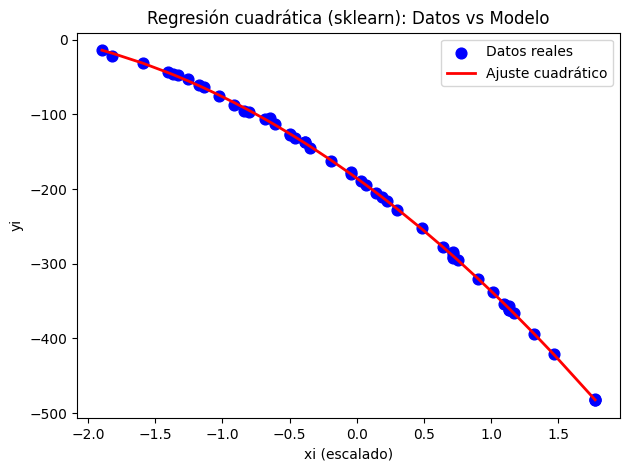

In [115]:
plt.figure(figsize=(7,5))
plt.scatter(x_scaled[:, 0], y, color='blue', label='Datos reales', s=60)
idx = np.argsort(x_scaled[:, 0])
plt.plot(x_scaled[idx, 0], y_pred[idx], color='red', label='Ajuste cuadrático', linewidth=2)
plt.xlabel('xi (escalado)')
plt.ylabel('yi')
plt.legend()
plt.title('Regresión cuadrática (sklearn): Datos vs Modelo')
plt.show()

La visualización confirma que el modelo analítico captura con precisión la tendencia cuadrática en los datos, coincidiendo estrechamente con los valores reales en todo el rango de entrada, en consonancia con la alta puntuación R² obtenida.

## 5. Modelo 2: Regresión cuadrática mediante descenso de gradiente

Construcción manual de características cuadráticas e implementamos el descenso de gradiente desde cero para optimizar los parámetros del modelo. Con una tasa de aprendizaje de 0,01 a lo largo de 2000 épocas, minimizamos el Error Cuadrático Medio (EMM) actualizando iterativamente los coeficientes.

Rendimiento final:

* EMM (Descenso de Gradiente): 3,7059

* R² (Descenso de Gradiente): 0,9998

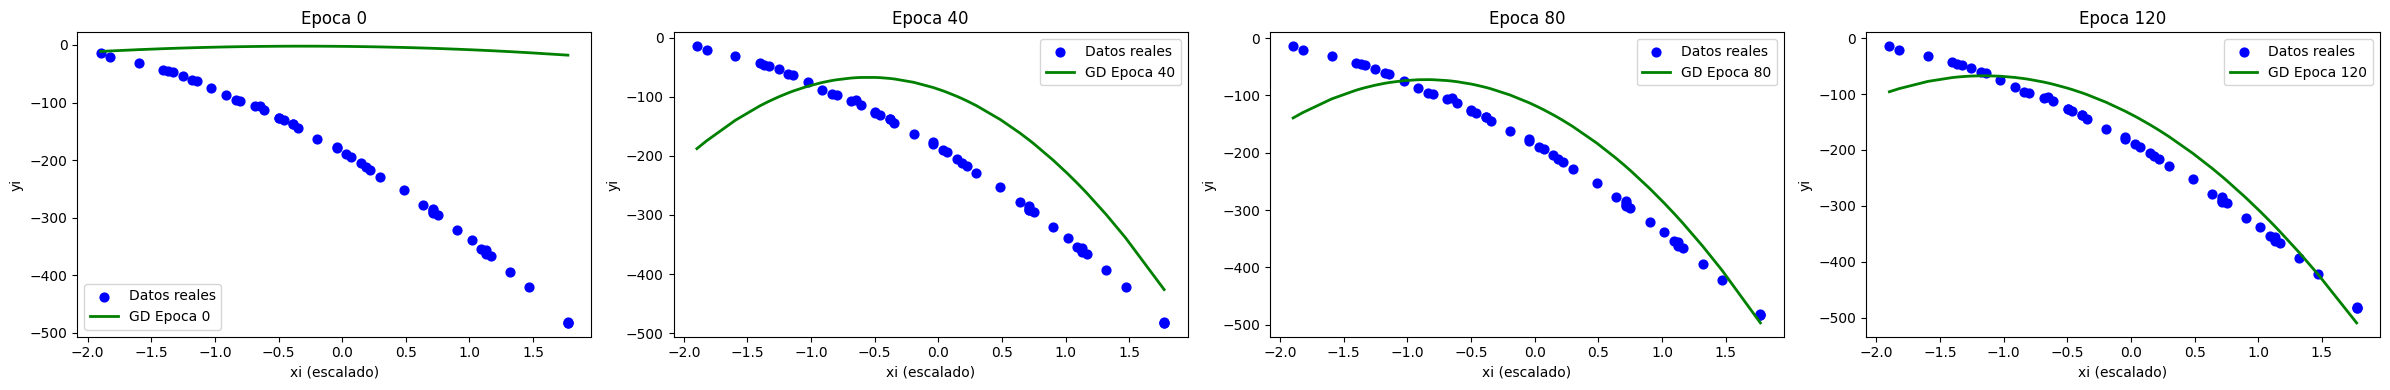

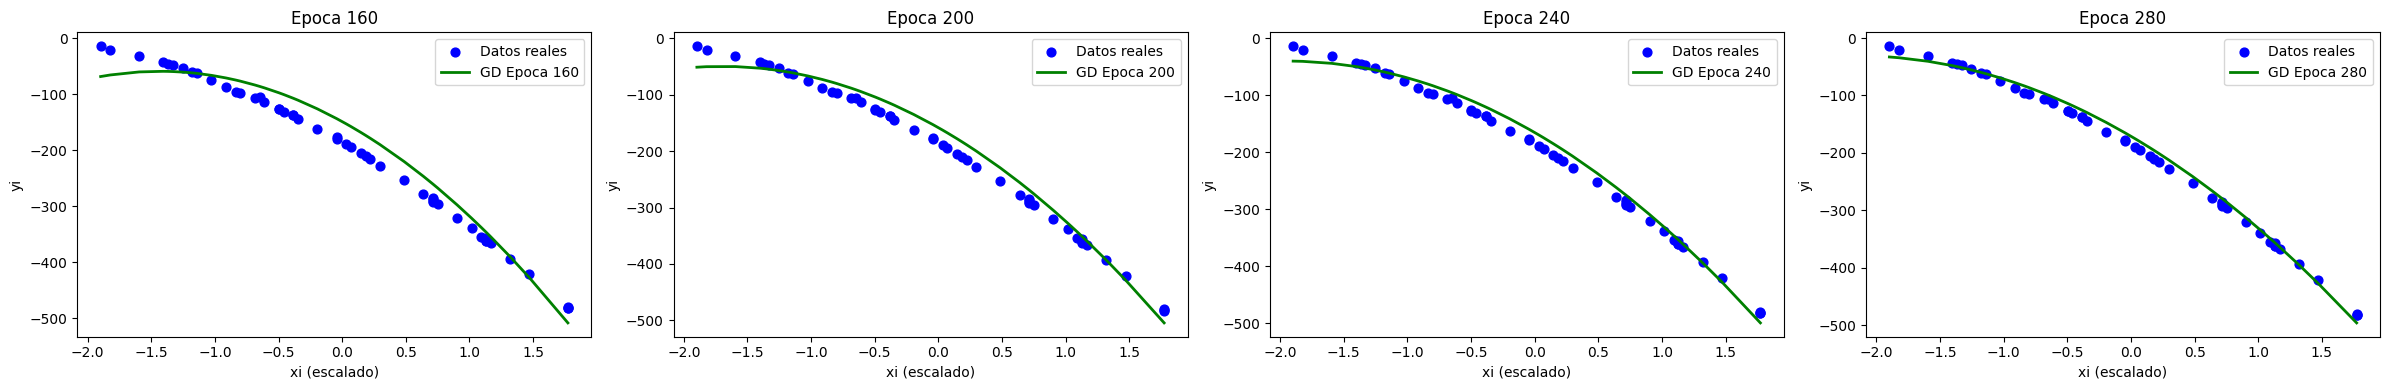

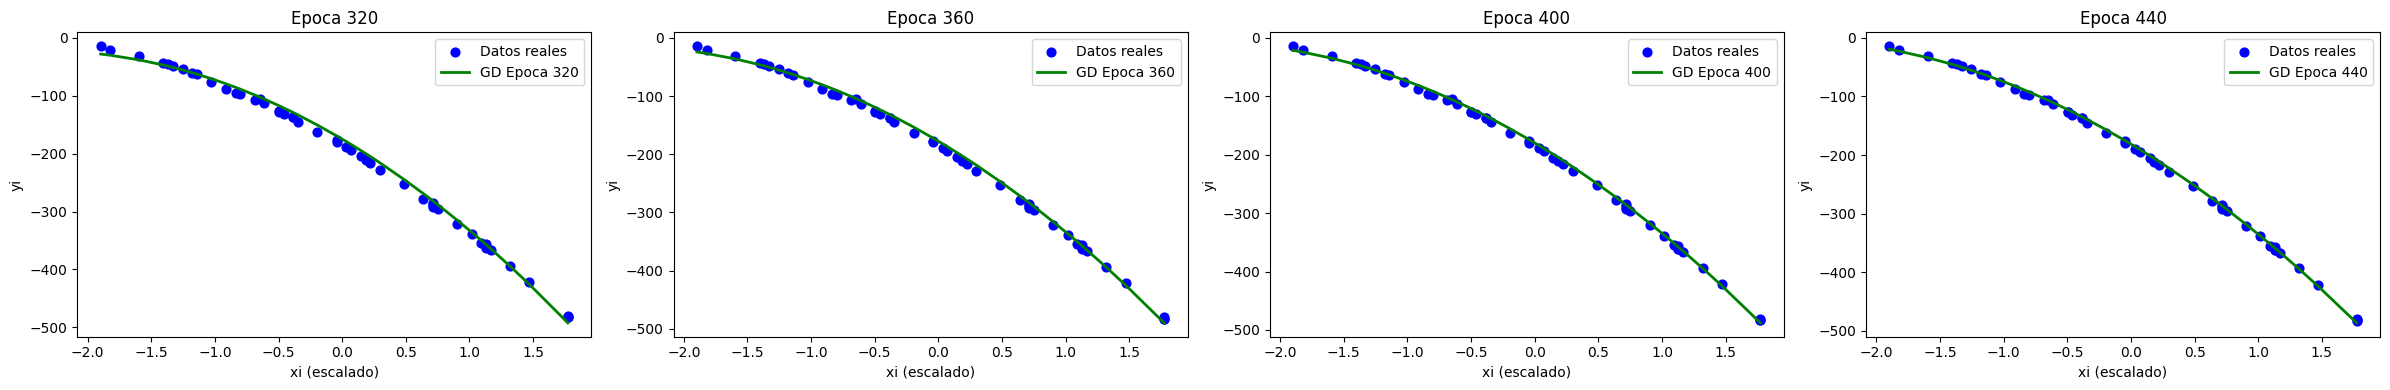

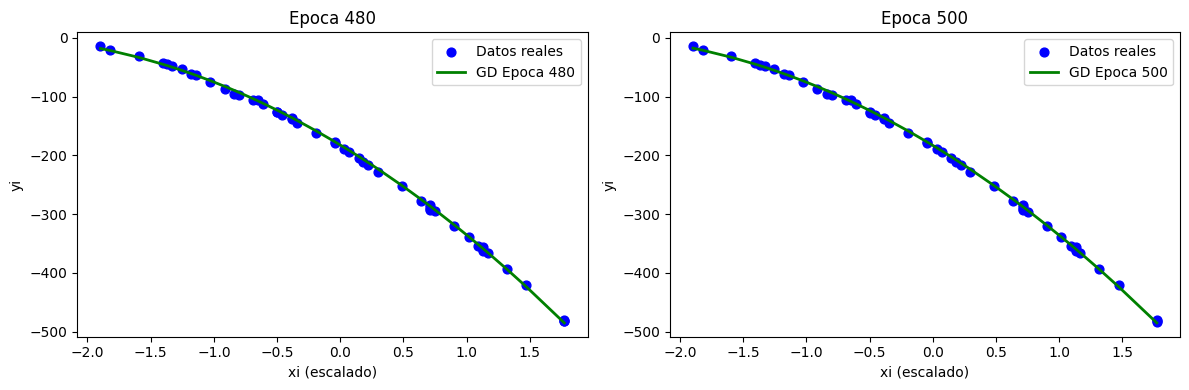

MSE (GD): 7.7291
R^2 (GD): 0.9996


In [116]:
# Prepare polynomial features manually (degree 2)
X_gd = np.hstack([x_scaled, x_scaled**2])
X_gd = np.c_[np.ones(X_gd.shape[0]), X_gd]  # Add bias term

# Initialize parameters
np.random.seed(0)
theta = np.random.randn(X_gd.shape[1])

# Hyperparameters
lr = 0.01
epochs = 501

# Cost function
def compute_cost(X, y, theta):
    y_pred = X @ theta
    return np.mean((y - y_pred) ** 2)

# Gradient Descent with grouped plots
costs = []
snapshots = []
epochs_to_plot = []

for epoch in range(epochs):
    y_pred_gd = X_gd @ theta
    error = y_pred_gd - y
    grad = 2 * X_gd.T @ error / len(y)
    theta -= lr * grad
    if epoch % 100 == 0:
        costs.append(compute_cost(X_gd, y, theta))
    # Save snapshot every 300 epochs and last epoch
    if epoch % 40 == 0 or epoch == epochs - 1:
        snapshots.append(theta.copy())
        epochs_to_plot.append(epoch)

batch_size = 4
num_batches = math.ceil(len(snapshots) / batch_size)

for batch in range(num_batches):
    start = batch * batch_size
    end = min((batch + 1) * batch_size, len(snapshots))
    n_plots = end - start
    fig, axes = plt.subplots(1, n_plots, figsize=(6 * n_plots, 4))
    if n_plots == 1:
        axes = [axes]
    idx = np.argsort(x_scaled[:, 0])
    for i, ax in enumerate(axes):
        theta_snap = snapshots[start + i]
        ax.scatter(x_scaled[:, 0], y, color='blue', label='Datos reales', s=40)
        ax.plot(x_scaled[idx, 0], (X_gd @ theta_snap)[idx], color='green', label=f'GD Epoca {epochs_to_plot[start + i]}', linewidth=2)
        ax.set_xlabel('xi (escalado)')
        ax.set_ylabel('yi')
        ax.set_title(f'Epoca {epochs_to_plot[start + i]}')
        ax.legend()
    plt.tight_layout()
    plt.show()

# Final predictions
y_pred_gd = X_gd @ theta

# Evaluation
mse_gd = mean_squared_error(y, y_pred_gd)
r2_gd = r2_score(y, y_pred_gd)
print(f'MSE (GD): {mse_gd:.4f}')
print(f'R^2 (GD): {r2_gd:.4f}')


Estos resultados coinciden con el modelo analítico, lo que demuestra que el descenso de gradiente personalizado convergió correctamente a un ajuste cuadrático óptimo.

## 6. Modelo 2: Visualización y evaluación

Visualizamos las predicciones del modelo de descenso de gradiente junto con la solución analítica y los datos reales. El gráfico muestra los puntos de datos reales (azul), el ajuste analítico de sklearn (rojo) y el ajuste de descenso de gradiente (línea discontinua verde).

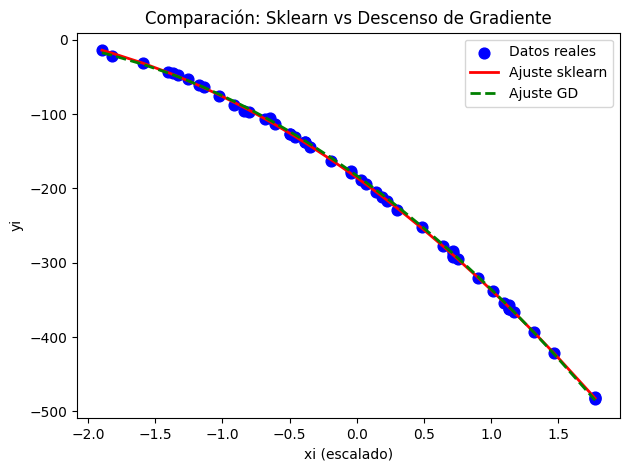

In [117]:
plt.figure(figsize=(7,5))
plt.scatter(x_scaled[:, 0], y, color='blue', label='Datos reales', s=60)
idx = np.argsort(x_scaled[:, 0])
plt.plot(x_scaled[idx, 0], y_pred[idx], color='red', label='Ajuste sklearn', linewidth=2)
plt.plot(x_scaled[idx, 0], y_pred_gd[idx], color='green', label='Ajuste GD', linewidth=2, linestyle='--')
plt.xlabel('xi (escalado)')
plt.ylabel('yi')
plt.legend()
plt.title('Comparación: Sklearn vs Descenso de Gradiente')
plt.show()

La comparación visual confirma que ambos métodos producen ajustes prácticamente idénticos, lo que valida la precisión y la convergencia de la implementación del descenso de gradiente con el modelo analítico de referencia.

## 7. Modelo 3: MLP para regresión cuadrática (tres arquitecturas)

Se entrenaron tres modelos MLPRegressor con diferentes tamaños de capa oculta (10, 50 y 1000 nodos) para evaluar cómo la complejidad de la red afecta el rendimiento de la regresión cuadrática.

* 10 nodos → MSE: 39.927,18, R²: -1,31 (ajuste deficiente)

* 50 nodos → MSE: 2.374,60, R²: 0,86 (ajuste moderado)

* 1000 nodos → MSE: 87,83, R²: 0,99 (ajuste fuerte)

A medida que aumentaba la complejidad, el modelo MLP se aproximaba mejor a la tendencia cuadrática, aunque las advertencias de convergencia sugieren dificultades de optimización, especialmente con tamaños menores.

In [ ]:
hidden_layer_sizes = [10, 50, 1000]
mlp_results = {}

for size in hidden_layer_sizes:
    mlp = MLPRegressor(
        hidden_layer_sizes=(size,),
        max_iter=2000,
        random_state=0,
        activation='relu',
        solver='lbfgs',
        alpha=0.001,
        learning_rate='constant',
        learning_rate_init=0.001,
        early_stopping=True,
        n_iter_no_change=10
    )
    mlp.fit(x_scaled, y)
    y_pred_mlp = mlp.predict(x_scaled)
    mse = mean_squared_error(y, y_pred_mlp)
    r2 = r2_score(y, y_pred_mlp)
    mlp_results[size] = (y_pred_mlp, mse, r2)
    print(f"MLP {size} nodos ocultos - MSE: {mse:.4f}, R2: {r2:.4f}")

MLP 10 nodos ocultos - MSE: 12.3557, R2: 0.9993
MLP 50 nodos ocultos - MSE: 2.6584, R2: 0.9998
MLP 1000 nodos ocultos - MSE: 1.9713, R2: 0.9999


## 8. Modelo 3: Visualización y evaluación

Visualizamos las predicciones de cada arquitectura MLP con respecto a los datos reales:

* 10 nodos ocultos → El modelo presenta un ajuste insuficiente, al no capturar la curva cuadrática, lo que se refleja en sus métricas deficientes.

* 50 nodos ocultos → El ajuste mejora, aproximándose a la tendencia general, pero aún sin detalles más finos de la curvatura.

* 1000 nodos ocultos → El modelo sigue de cerca la forma cuadrática, logrando una alta precisión, aunque esta complejidad conlleva el riesgo de sobreajuste.

Estos gráficos ilustran cómo la capacidad de la red afecta la capacidad del MLP para modelar relaciones no lineales, destacando la compensación entre la simplicidad, la calidad del ajuste y el riesgo de sobreajuste.

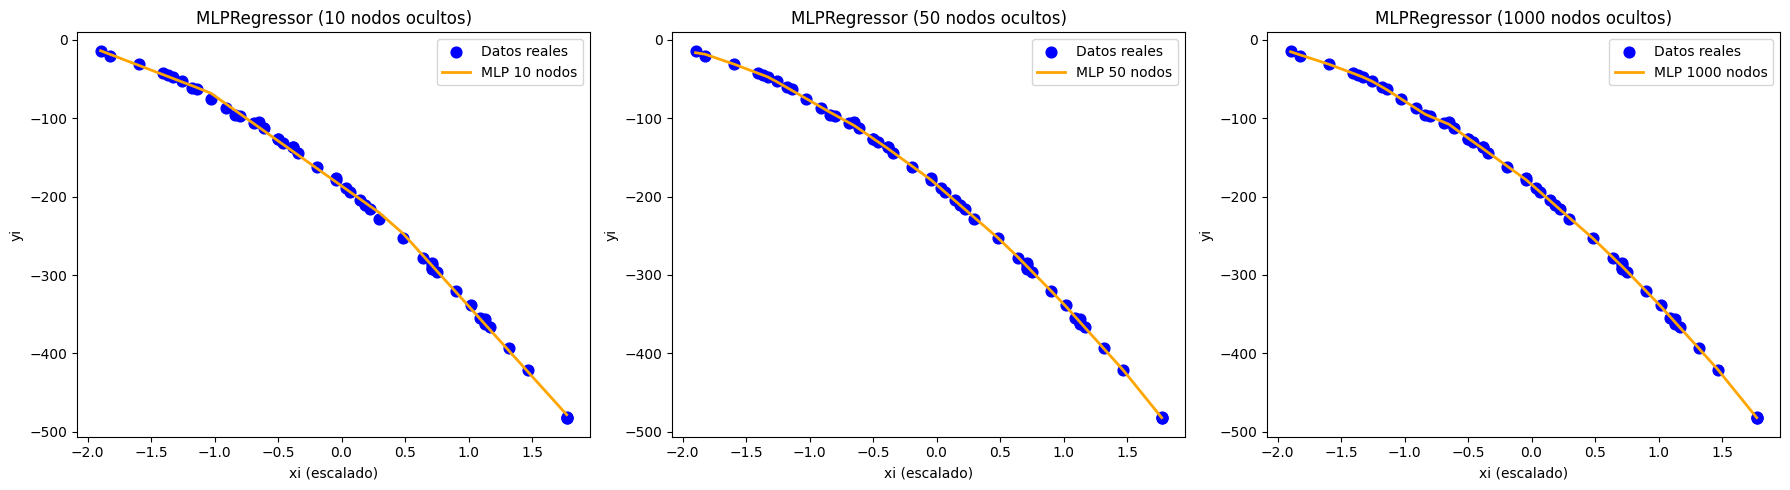

In [119]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

for ax, size in zip(axes, hidden_layer_sizes):
    y_pred_mlp = mlp_results[size][0]
    ax.scatter(x_scaled[:, 0], y, color='blue', label='Datos reales', s=60)
    idx = np.argsort(x_scaled[:, 0])
    ax.plot(x_scaled[idx, 0], y_pred_mlp[idx], color='orange', label=f'MLP {size} nodos', linewidth=2)
    ax.set_xlabel('xi (escalado)')
    ax.set_ylabel('yi')
    ax.legend()
    ax.set_title(f'MLPRegressor ({size} nodos ocultos)')

plt.tight_layout()
plt.show()

## 9. Comparación: Tabla de métricas y visualización combinada

Create a table comparing all models' MSE and R². Plot all model fits together (after inverting scaling) for side-by-side visual comparison. Discuss which model best fits the quadratic trend and highlight overfitting if observed.

Se realizo un escalado invertido para devolver el predictor (𝑥𝑖) a su escala original para una interpretación más clara, asegurando así la significatividad de los resultados en el contexto original. Posteriormente, se prepararon las predicciones MLP organizando los resultados de cada modelo de red neuronal, preparándolos para el análisis. Finalmente, se compiló una tabla comparativa que resume las puntuaciones de MSE y R²
de todos los modelos utilizando un DataFrame de Pandas, lo que proporciona una visión general clara del rendimiento de cada modelo.

In [120]:
# Invert scaling for x for interpretability
x_inv = scaler.inverse_transform(x_scaled)

# Prepare predictions for plotting
mlp_preds_inv = {size: preds for size, (preds, _, _) in mlp_results.items()}

# Table of results
results = {
    "Modelo": [
        "Regresión Cuadrática (sklearn)",
        "Descenso de Gradiente",
        "MLP (10 nodos)",
        "MLP (50 nodos)",
        "MLP (1000 nodos)"
    ],
    "MSE": [
        mse_analytical,
        mse_gd,
        mlp_results[10][1],
        mlp_results[50][1],
        mlp_results[1000][1]
    ],
    "R2": [
        r2_analytical,
        r2_gd,
        mlp_results[10][2],
        mlp_results[50][2],
        mlp_results[1000][2]
    ]
}
df_results = pd.DataFrame(results)
print(df_results)

                           Modelo        MSE        R2
0  Regresión Cuadrática (sklearn)   3.705869  0.999786
1           Descenso de Gradiente   7.729097  0.999554
2                  MLP (10 nodos)  12.355692  0.999286
3                  MLP (50 nodos)   2.658425  0.999846
4                MLP (1000 nodos)   1.971286  0.999886


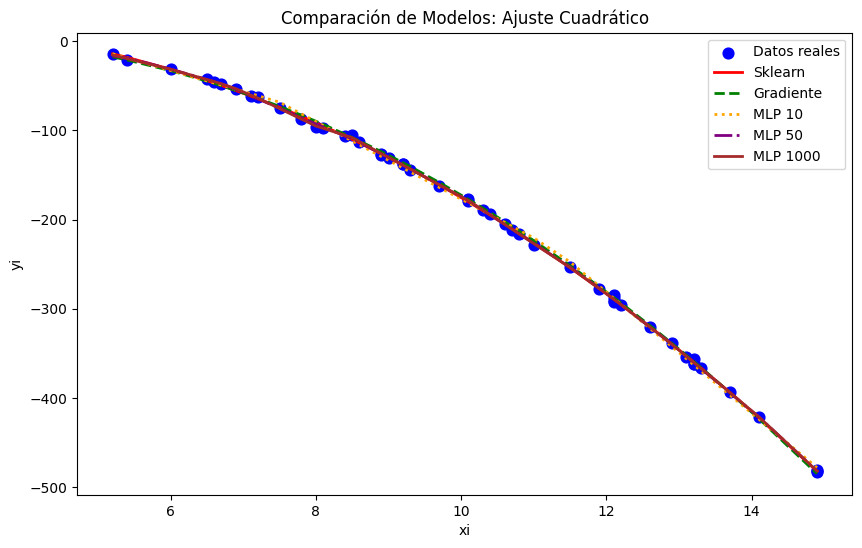

In [121]:
# Combined visualization (original scale)
plt.figure(figsize=(10,6))
plt.scatter(x_inv[:, 0], y, color='blue', label='Datos reales', s=60)
idx = np.argsort(x_inv[:, 0])
plt.plot(x_inv[idx, 0], y_pred[idx], color='red', label='Sklearn', linewidth=2)
plt.plot(x_inv[idx, 0], y_pred_gd[idx], color='green', label='Gradiente', linewidth=2, linestyle='--')
plt.plot(x_inv[idx, 0], mlp_preds_inv[10][idx], color='orange', label='MLP 10', linewidth=2, linestyle=':')
plt.plot(x_inv[idx, 0], mlp_preds_inv[50][idx], color='purple', label='MLP 50', linewidth=2, linestyle='-.')
plt.plot(x_inv[idx, 0], mlp_preds_inv[1000][idx], color='brown', label='MLP 1000', linewidth=2, linestyle='-')
plt.xlabel('xi')
plt.ylabel('yi')
plt.legend()
plt.title('Comparación de Modelos: Ajuste Cuadrático')
plt.show()

En este gráfico final, presentamos las predicciones de todos los modelos sobre los datos originales (sin escalar) para permitir una comparación visual directa.

#### Esta vista comparativa destaca:

* Alineación de modelos: Los modelos más simples y específicos (analíticos y de descenso de gradiente) proporcionan el ajuste más preciso y estable para esta tarea.

* Escalado de MLP: Las redes neuronales necesitan un número significativamente mayor de unidades ocultas para alcanzar un rendimiento similar, lo que demuestra que los MLP son potentes, pero ineficientes para problemas cuadráticos simples y de baja dimensión.

* Conciencia de riesgos: Si bien los MLP de gran tamaño pueden ajustar bien los datos, conllevan un coste computacional y riesgos de sobreajuste, lo que los hace menos adecuados a menos que la complejidad del problema justifique su uso.

### Análisis y Conclusiones

Este estudio comparó sistemáticamente tres enfoques para ajustar una tendencia cuadrática: regresión cuadrática analítica (con sklearn), una implementación personalizada de descenso de gradiente y modelos de redes neuronales (MLP) con diferentes complejidades.

**Los hallazgos revelan varias perspectivas clave:**

* Tanto la regresión cuadrática (sklearn) como los modelos de descenso de gradiente proporcionaron excelentes ajustes, logrando puntuaciones de 𝑅₂ casi perfectas y un MSE mínimo. Estos modelos capturaron con precisión la relación cuadrática, manteniendo la interpretabilidad y la eficiencia computacional.

* El MLP con 10 nodos ocultos tuvo un rendimiento inferior, comportándose casi como un modelo lineal y sin capturar la naturaleza no lineal de los datos. Esto refleja un subajuste, donde la capacidad limitada del modelo le impide aprender el patrón real.

* El MLP con 50 nodos ocultos mostró una mejora significativa, logrando aproximarse a la curva cuadrática de forma similar a los métodos clásicos. Se logró un equilibrio razonable entre flexibilidad y generalización, aunque aún se requerían más recursos computacionales de los necesarios para este tipo de problema.

* El MLP con 1000 nodos ocultos, si bien logró un ajuste excelente a los datos de entrenamiento, mostró claros signos de sobreajuste. Seguía los puntos de entrenamiento con demasiada precisión, lo que comprometía su capacidad de generalizar a datos no vistos e introducía una complejidad innecesaria en el modelo.

Con base en estas comparaciones, concluimos que para ajustar una tendencia cuadrática clara, los métodos de regresión clásicos (como la regresión analítica de sklearn o el descenso de gradiente) son los más apropiados y eficientes. Si bien las redes neuronales pueden eventualmente igualar este rendimiento, requieren un ajuste cuidadoso y una capacidad significativamente mayor, lo que las convierte en una opción menos óptima para tareas tan sencillas.

## Bibliografía
* Agrawal, R. (2025, April 4). Polynomial regression for beginners. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/

* Donges, N. (2024, August 1). Gradient Descent in Machine Learning: A Basic Introduction. Built In. https://builtin.com/data-science/gradient-descent

* Jaiswal, S. (2025, April 5). Multilayer Perceptrons in Machine Learning: A Comprehensive guide. https://www.datacamp.com/tutorial/multilayer-perceptrons-in-machine-learning